<a href="https://colab.research.google.com/github/phaneo/Hands-on-ML/blob/main/Intro_to_ANN_with_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptrons**

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X= iris.data[:, (2, 3)]
y = (iris.target ==0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

In [14]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

In [15]:
keras.__version__

'2.7.0'

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.

(-0.5, 27.5, 27.5, -0.5)

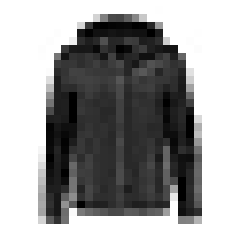

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


We can also pass a list of layers when creating a Sequential model:

```
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])
```



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


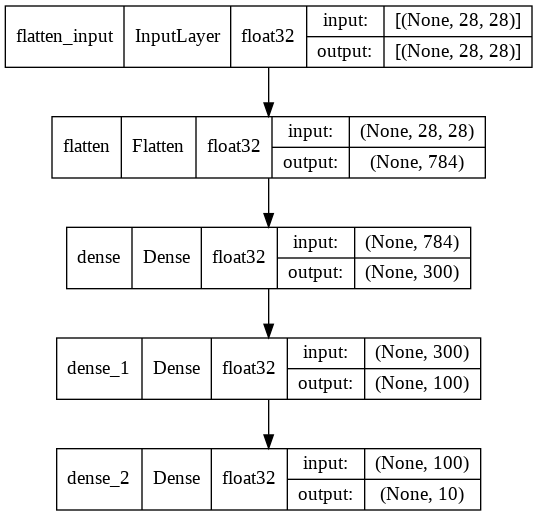

In [22]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [23]:
model.compile(loss ="sparse_categorical_crossentropy",
            optimizer = keras.optimizers.SGD(learning_rate=0.03),
              metrics= ["accuracy"]
              )

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.5889 - accuracy: 0.7938 - val_loss: 0.5025 - val_accuracy: 0.8102
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4267 - accuracy: 0.8476 - val_loss: 0.4015 - val_accuracy: 0.8600
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3834 - accuracy: 0.8614 - val_loss: 0.3788 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8719 - val_loss: 0.3451 - val_accuracy: 0.8722
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3357 - accuracy: 0.8783 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3182 - accuracy: 0.8831 - val_loss: 0.3519 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3047 - accuracy: 0.8886 - val_loss: 0.3238 - val_accuracy

(0.0, 1.0)

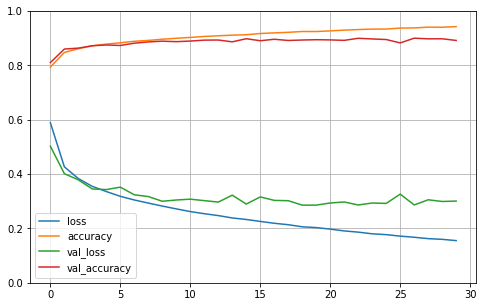

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8855


[0.3385319113731384, 0.8855000138282776]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
y_pred = np.argmax(model.predict(X_new), axis = 1)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [42]:
from sklearn import model_selection
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape= X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7969 - val_loss: 0.5765
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.4687 - val_loss: 0.5042
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4927 - val_loss: 0.4705
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4469 - val_loss: 0.4574
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4367 - val_loss: 0.4385
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4237 - val_loss: 0.4320
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4170 - val_loss: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4153 - val_loss: 0.4215
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4064 - val_loss: 0.4173
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4012 - val_loss: 0.4146

(0.0, 1.0)

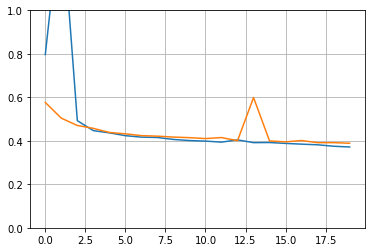

In [43]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [45]:
from numpy.core.fromnumeric import shape
input_ = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
Concatenate = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(Concatenate)

In [38]:
model = keras.Model(inputs = [input_], outputs = [output])

In [39]:
model.compile(optimizer="sgd", loss="mean_squared_error")

In [40]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 8ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 2s 7ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 4

In [50]:
input_A = keras.layers.Input(shape=[5], name = "wide input")
input_B = keras.layers.Input(shape=[6], name = "deep input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
Concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(Concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [51]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3), loss = "mse")

In [54]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [55]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4848 - val_loss: 0.4945
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4818 - val_loss: 0.4977
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4803 - val_loss: 0.4901
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4795 - val_loss: 0.4921
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4766 - val_loss: 0.4873
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4757 - val_loss: 0.4950
Epoch 7/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4739 - val_loss: 0.4846
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4733 - val_loss: 0.4851
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4710 - val_loss: 0.4847
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4695 - val_loss: 0.4817

In [1]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
      super().__init__(**kwargs)
      self.hidden1 = keras.layers.Dense(units, activation=activation)
      self.hidden2 = keras.layers.Dense(units, activation=activation)
      self.main_output = keras.layers.Dense(1)
      self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_A)
    hidden2 = self.hidden2(input_B)
    concat = keras.layers.concatenate([input_A, input_B])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

NameError: ignored